#Не запускать

In [ ]:
import requests

def download_file_from_google_drive(id, destination):
    URL = "https://docs.google.com/uc?export=download"

    session = requests.Session()

    response = session.get(URL, params = { 'id' : id }, stream = True)
    token = get_confirm_token(response)

    if token:
        params = { 'id' : id, 'confirm' : token }
        response = session.get(URL, params = params, stream = True)

    save_response_content(response, destination)    

def get_confirm_token(response):
    for key, value in response.cookies.items():
        if key.startswith('download_warning'):
            return value

    return None

def save_response_content(response, destination):
    CHUNK_SIZE = 32768

    with open(destination, "wb") as f:
        for chunk in response.iter_content(CHUNK_SIZE):
            if chunk: # filter out keep-alive new chunks
                f.write(chunk)


# file_id = '1004KxCA9-n6PqkIgJhQ7tmhU6E3kET_I'
# destination = '/content/width.zip'
# download_file_from_google_drive(file_id, destination)
file_id = '1hSFD4hpgaDPTNBJHZb67umbv2rT-uaXj'
destination = '/content/weight.zip'
download_file_from_google_drive(file_id, destination)

# !unzip -q weight.zip
!unzip -q weight.zip -d /content/data
!ls

[weight.zip]
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of weight.zip or
        weight.zip.zip, and cannot find weight.zip.ZIP, period.
drive  sample_data  weight.zip


In [ ]:
import os
import zipfile
    
def zipdir(path, ziph):
    # ziph is zipfile handle
    for root, dirs, files in os.walk(path):
        for file in files:
            ziph.write(os.path.join(root, file), 
                       os.path.relpath(os.path.join(root, file), 
                                       os.path.join(path, '..')))

with zipfile.ZipFile('/content/drive/MyDrive/colabData/fontData/data/weightCorrect', 'w', zipfile.ZIP_DEFLATED) as zipf:
    zipdir('/content/drive/MyDrive/colabData/fontData/data/weight', zipf)

In [ ]:
!unzip -q /content/f3.zip -d /content/data1

[/content/f3.zip]
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of /content/f3.zip or
        /content/f3.zip.zip, and cannot find /content/f3.zip.ZIP, period.


In [ ]:
!xar -xf /content/weight.zip
!sudo tar zxvf Content

/bin/bash: xar: command not found
tar (child): Content: Cannot open: No such file or directory
tar (child): Error is not recoverable: exiting now
tar: Child returned status 2
tar: Error is not recoverable: exiting now


In [ ]:
!7z x /content/weight.zip


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan /content/                   1 file, 2215 bytes (3 KiB)

Extracting archive: /content/weight.zip
ERROR: /content/weight.zip
/content/weight.zip
Open ERROR: Can not open the file as [zip] archive


ERRORS:
Is not archive
  0%    
Can't open as archive: 1
Files: 0
Size:       0
Compressed: 0


In [ ]:
import shutil
output_filename = '/content/drive/MyDrive/colabData/fontData/data/weightZ'
dir_name = '/content/drive/MyDrive/colabData/fontData/data/weight'
shutil.make_archive(output_filename, 'zip', dir_name)

'/content/drive/MyDrive/colabData/fontData/data/weightZ.zip'

#Запускать

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
from PIL import Image, ImageDraw, ImageFont
import numpy as np
from matplotlib import cm
import random
import string


def generateRandomSample(fontPath, picSize=(400*4,50*4)):
  im = Image.new('RGB', picSize, color=('#FFFFFF'))
  font = ImageFont.truetype(fontPath, size=80)
  draw_text = ImageDraw.Draw(im)
  draw_text.text(
      (5, 5),
      generate_random_string(20),
      font=font,
      fill='#000000')
  return im


def generate_random_string(length):
  letters = string.ascii_letters
  rand_string = ''.join(random.choice(letters) for i in range(length))
  # print("Random string of length", length, "is:", rand_string)
  return "ABCDEFGHIJKLMNOPQRSTUVWXY\nabcdefghijklmnopqrstuvwxyz"
  # return rand_string

In [ ]:
contrast = ('High Contrast', 'nonHC')
classificationArr = ('Display', 'Sans Serif', 'Serif', 'Monospaced', 'Handwritten')
weighArr = ('0ultralight', '1thin', '2light', '3regular', '4medium', '5semibold', '6bold', '7heavy', '8black')
weighArrStr = ('100', '200', '300', 'regular', '500', '600', '700', '800', '900')
widthArr = ('Condensed', 'Narrow', 'Wide')

category = weighArr

In [ ]:
already = [('Zen Maru Gothic.ttf', '7heavy'),
 ('Zen Kaku Gothic New.ttf', '7heavy'),
 ('Zen Kaku Gothic Antique.ttf', '7heavy'),
 ('Yantramanav.ttf', '8black'),
 ('Work Sans.ttf', '8black'),
 ('Vollkorn SC.ttf', '8black'),
 ('Vollkorn.ttf', '8black'),
 ('Truculenta.ttf', '7heavy'),
 ('Tourney.ttf', '7heavy'),
 ('Titillium Web.ttf', '8black'),
 ('Tienne.ttf', '8black'),
 ('Texturina.ttf', '7heavy'),
 ('Spartan.ttf', '8black'),
 ('Source Serif Pro.ttf', '7heavy'),
 ('Source Sans Pro.ttf', '7heavy'),
 ('Source Code Pro.ttf', '8black'),
 ('Simonetta.ttf', '7heavy'),
 ('Sarpanch.ttf', '8black'),
 ('Sansita Swashed.ttf', '8black'),
 ('Sansita.ttf', '8black'),
 ('Ruda.ttf', '7heavy'),
 ('Rubik.ttf', '8black'),
 ('Rokkitt.ttf', '7heavy'),
 ('Roboto Slab.ttf', '7heavy'),
 ('Roboto.ttf', '7heavy'),
 ('Red Hat Display.ttf', '7heavy'),
 ('Recursive.ttf', '8black'),
 ('Raleway.ttf', '8black'),
 ('Public Sans.ttf', '8black'),
 ('Prompt.ttf', '8black'),
 ('Poppins.ttf', '8black'),
 ('Playfair Display SC.ttf', '7heavy'),
 ('Playfair Display.ttf', '7heavy'),
 ('Petrona.ttf', '7heavy'),
 ('Passion One.ttf', '8black'),
 ('Overpass.ttf', '7heavy'),
 ('Overlock.ttf', '6bold'),
 ('Orbitron.ttf', '7heavy'),
 ('Nunito.ttf', '7heavy'),
 ('Noto Serif Tibetan.ttf', '8black'),
 ('Noto Serif Thai.ttf', '8black'),
 ('Noto Serif Telugu.ttf', '8black'),
 ('Noto Serif Tamil.ttf', '8black'),
 ('Noto Serif TC.ttf', '8black'),
 ('Noto Serif Sinhala.ttf', '8black'),
 ('Noto Serif SC.ttf', '6bold'),
 ('Noto Serif Myanmar.ttf', '8black'),
 ('Noto Serif Malayalam.ttf', '8black'),
 ('Noto Serif Lao.ttf', '8black'),
 ('Noto Serif Khmer.ttf', '8black'),
 ('Noto Serif Kannada.ttf', '8black'),
 ('Noto Serif KR.ttf', '6bold'),
 ('Noto Serif JP.ttf', '6bold'),
 ('Noto Serif Hebrew.ttf', '8black'),
 ('Noto Serif Gurmukhi.ttf', '8black'),
 ('Noto Serif Gujarati.ttf', '8black'),
 ('Noto Serif Georgian.ttf', '8black'),
 ('Noto Serif Ethiopic.ttf', '8black'),
 ('Noto Serif Display.ttf', '7heavy'),
 ('Noto Serif Devanagari.ttf', '8black'),
 ('Noto Serif Bengali.ttf', '8black'),
 ('Noto Serif Armenian.ttf', '8black'),
 ('Noto Sans Thai Looped.ttf', '8black'),
 ('Noto Sans Thai.ttf', '8black'),
 ('Noto Sans Thaana.ttf', '8black'),
 ('Noto Sans Telugu.ttf', '8black'),
 ('Noto Sans Tamil.ttf', '8black'),
 ('Noto Sans TC.ttf', '7heavy'),
 ('Noto Sans Syriac.ttf', '8black'),
 ('Noto Sans Symbols.ttf', '7heavy'),
 ('Noto Sans Sinhala.ttf', '8black'),
 ('Noto Sans SC.ttf', '7heavy'),
 ('Noto Sans Oriya.ttf', '8black'),
 ('Noto Sans Myanmar.ttf', '8black'),
 ('Noto Sans Mono.ttf', '7heavy'),
 ('Noto Sans Meetei Mayek.ttf', '8black'),
 ('Noto Sans Malayalam.ttf', '8black'),
 ('Noto Sans Lao.ttf', '8black'),
 ('Noto Sans Khmer.ttf', '8black'),
 ('Noto Sans Kannada.ttf', '8black'),
 ('Noto Sans KR.ttf', '7heavy'),
 ('Noto Sans JP.ttf', '8black'),
 ('Noto Sans Hebrew.ttf', '8black'),
 ('Noto Sans HK.ttf', '7heavy'),
 ('Noto Sans Gurmukhi.ttf', '8black'),
 ('Noto Sans Gujarati.ttf', '8black'),
 ('Noto Sans Georgian.ttf', '8black'),
 ('Noto Sans Devanagari.ttf', '8black'),
 ('Noto Sans Cherokee.ttf', '8black'),
 ('Noto Sans Cham.ttf', '8black'),
 ('Noto Sans Canadian Aboriginal.ttf', '8black'),
 ('Noto Sans Bengali.ttf', '8black'),
 ('Noto Sans Armenian.ttf', '8black'),
 ('Noto Sans Arabic.ttf', '8black'),
 ('Noto Rashi Hebrew.ttf', '8black'),
 ('Noto Kufi Arabic.ttf', '8black'),
 ('MuseoModerno.ttf', '8black'),
 ('Mulish.ttf', '8black'),
 ('Montserrat Alternates.ttf', '8black'),
 ('Montserrat.ttf', '8black'),
 ('Merriweather.ttf', '7heavy'),
 ('Maven Pro.ttf', '8black'),
 ('Martel Sans.ttf', '7heavy'),
 ('M PLUS Rounded 1c.ttf', '7heavy'),
 ('M PLUS 2.ttf', '8black'),
 ('M PLUS 1p.ttf', '8black'),
 ('M PLUS 1.ttf', '8black'),
 ('Londrina Solid.ttf', '7heavy'),
 ('Literata.ttf', '7heavy'),
 ('Lato.ttf', '7heavy'),
 ('Kanit.ttf', '8black'),
 ('Jost.ttf', '8black'),
 ('Inter.ttf', '8black'),
 ('Inknut Antiqua.ttf', '8black'),
 ('Inconsolata.ttf', '7heavy'),
 ('Imbue.ttf', '6bold'),
 ('Heebo.ttf', '7heavy'),
 ('Grenze Gotisch.ttf', '7heavy'),
 ('Grenze.ttf', '7heavy'),
 ('Grandstander.ttf', '8black'),
 ('Gothic A1.ttf', '6bold'),
 ('Georama.ttf', '8black'),
 ('Fraunces.ttf', '7heavy'),
 ('Frank Ruhl Libre.ttf', '6bold'),
 ('Fira Sans Extra Condensed.ttf', '7heavy'),
 ('Fira Sans.ttf', '7heavy'),
 ('Exo 2.ttf', '8black'),
 ('Exo.ttf', '7heavy'),
 ('Encode Sans Semi Expanded.ttf', '8black'),
 ('Encode Sans Semi Condensed.ttf', '8black'),
 ('Encode Sans SC.ttf', '8black'),
 ('Encode Sans Expanded.ttf', '8black'),
 ('Encode Sans Condensed.ttf', '8black'),
 ('Encode Sans.ttf', '8black'),
 ('Elsie Swash Caps.ttf', '7heavy'),
 ('Elsie.ttf', '7heavy'),
 ('Darker Grotesque.ttf', '7heavy'),
 ('Crimson Pro.ttf', '7heavy'),
 ('Coustard.ttf', '8black'),
 ('Commissioner.ttf', '8black'),
 ('Cinzel Decorative.ttf', '7heavy'),
 ('Cinzel.ttf', '7heavy'),
 ('Chivo.ttf', '8black'),
 ('Catamaran.ttf', '7heavy'),
 ('Blinker.ttf', '8black'),
 ('Bitter.ttf', '7heavy'),
 ('Biryani.ttf', '7heavy'),
 ('Big Shoulders Text.ttf', '7heavy'),
 ('Big Shoulders Stencil Text.ttf', '7heavy'),
 ('Big Shoulders Stencil Display.ttf', '7heavy'),
 ('Big Shoulders Inline Text.ttf', '7heavy'),
 ('Big Shoulders Inline Display.ttf', '7heavy'),
 ('Big Shoulders Display.ttf', '7heavy'),
 ('Besley.ttf', '8black'),
 ('Be Vietnam Pro.ttf', '7heavy'),
 ('Barlow Semi Condensed.ttf', '8black'),
 ('Barlow Condensed.ttf', '8black'),
 ('Barlow.ttf', '8black'),
 ('Arima Madurai.ttf', '6bold'),
 ('Archivo.ttf', '7heavy'),
 ('Alegreya Sans SC.ttf', '7heavy'),
 ('Alegreya Sans.ttf', '8black'),
 ('Alegreya SC.ttf', '8black'),
 ('Alegreya.ttf', '8black'),
 ('Work Sans.ttf', '8black'),
 ('Vollkorn.ttf', '7heavy'),
 ('Truculenta.ttf', '7heavy'),
 ('Tourney.ttf', '7heavy'),
 ('Tillana.ttf', '7heavy'),
 ('Texturina.ttf', '6bold'),
 ('Syne.ttf', '7heavy'),
 ('Stick No Bills.ttf', '7heavy'),
 ('Spectral SC.ttf', '7heavy'),
 ('Spectral.ttf', '7heavy'),
 ('Spartan.ttf', '7heavy'),
 ('Solway.ttf', '7heavy'),
 ('Sniglet.ttf', '8black'),
 ('Sen.ttf', '7heavy'),
 ('Sarpanch.ttf', '7heavy'),
 ('Sansita Swashed.ttf', '7heavy'),
 ('Sansita.ttf', '8black'),
 ('Ruda.ttf', '7heavy'),
 ('Rubik.ttf', '8black'),
 ('Rokkitt.ttf', '7heavy'),
 ('Roboto Slab.ttf', '7heavy'),
 ('Red Hat Display.ttf', '7heavy'),
 ('Recursive.ttf', '7heavy'),
 ('Raleway.ttf', '8black'),
 ('Public Sans.ttf', '8black'),
 ('Proza Libre.ttf', '8black'),
 ('Prompt.ttf', '8black'),
 ('Poppins.ttf', '8black'),
 ('Podkova.ttf', '7heavy'),
 ('Playfair Display.ttf', '7heavy'),
 ('Petrona.ttf', '7heavy'),
 ('Oxanium.ttf', '8black'),
 ('Overpass.ttf', '7heavy'),
 ('Orbitron.ttf', '7heavy'),
 ('Open Sans.ttf', '7heavy'),
 ('Nunito.ttf', '7heavy'),
 ('Noto Serif Tibetan.ttf', '8black'),
 ('Noto Serif Thai.ttf', '8black'),
 ('Noto Serif Telugu.ttf', '8black'),
 ('Noto Serif Tamil.ttf', '8black'),
 ('Noto Serif Sinhala.ttf', '8black'),
 ('Noto Serif Myanmar.ttf', '8black'),
 ('Noto Serif Malayalam.ttf', '8black'),
 ('Noto Serif Lao.ttf', '8black'),
 ('Noto Serif Khmer.ttf', '8black'),
 ('Noto Serif Kannada.ttf', '8black'),
 ('Noto Serif Hebrew.ttf', '8black'),
 ('Noto Serif Gurmukhi.ttf', '8black'),
 ('Noto Serif Gujarati.ttf', '8black'),
 ('Noto Serif Georgian.ttf', '8black'),
 ('Noto Serif Ethiopic.ttf', '8black'),
 ('Noto Serif Display.ttf', '7heavy'),
 ('Noto Serif Devanagari.ttf', '8black'),
 ('Noto Serif Bengali.ttf', '8black'),
 ('Noto Serif Armenian.ttf', '8black'),
 ('Noto Sans Thai Looped.ttf', '8black'),
 ('Noto Sans Thai.ttf', '8black'),
 ('Noto Sans Thaana.ttf', '8black'),
 ('Noto Sans Telugu.ttf', '8black'),
 ('Noto Sans Tamil.ttf', '8black'),
 ('Noto Sans Symbols.ttf', '7heavy'),
 ('Noto Sans Sinhala.ttf', '8black'),
 ('Noto Sans Myanmar.ttf', '8black'),
 ('Noto Sans Mono.ttf', '7heavy'),
 ('Noto Sans Meetei Mayek.ttf', '8black'),
 ('Noto Sans Malayalam.ttf', '8black'),
 ('Noto Sans Lao.ttf', '8black'),
 ('Noto Sans Khmer.ttf', '8black'),
 ('Noto Sans Kannada.ttf', '8black'),
 ('Noto Sans Hebrew.ttf', '8black'),
 ('Noto Sans Gurmukhi.ttf', '8black'),
 ('Noto Sans Gujarati.ttf', '8black'),
 ('Noto Sans Georgian.ttf', '8black'),
 ('Noto Sans Devanagari.ttf', '8black'),
 ('Noto Sans Cherokee.ttf', '8black'),
 ('Noto Sans Cham.ttf', '8black'),
 ('Noto Sans Canadian Aboriginal.ttf', '8black'),
 ('Noto Sans Bengali.ttf', '8black'),
 ('Noto Sans Armenian.ttf', '8black'),
 ('Noto Sans Arabic.ttf', '8black'),
 ('Noto Rashi Hebrew.ttf', '8black'),
 ('Noto Kufi Arabic.ttf', '8black'),
 ('Newsreader.ttf', '7heavy'),
 ('Neuton.ttf', '7heavy'),
 ('Nanum Myeongjo.ttf', '6bold'),
 ('Nanum Gothic.ttf', '6bold'),
 ('MuseoModerno.ttf', '8black'),
 ('Mulish.ttf', '8black'),
 ('Mukta Vaani.ttf', '7heavy'),
 ('Mukta Malar.ttf', '7heavy'),
 ('Mukta Mahee.ttf', '7heavy'),
 ('Mukta.ttf', '7heavy'),
 ('Montserrat Alternates.ttf', '8black'),
 ('Montserrat.ttf', '8black'),
 ('Merriweather Sans.ttf', '8black'),
 ('Maven Pro.ttf', '8black'),
 ('Martel Sans.ttf', '7heavy'),
 ('Manuale.ttf', '7heavy'),
 ('Manrope.ttf', '7heavy'),
 ('M PLUS Rounded 1c.ttf', '7heavy'),
 ('M PLUS 2.ttf', '8black'),
 ('M PLUS 1p.ttf', '8black'),
 ('M PLUS 1.ttf', '8black'),
 ('Literata.ttf', '8black'),
 ('Life Savers.ttf', '6bold'),
 ('Khula.ttf', '8black'),
 ('Karla.ttf', '8black'),
 ('Kanit.ttf', '8black'),
 ('Jost.ttf', '7heavy'),
 ('JetBrains Mono.ttf', '7heavy'),
 ('Inter.ttf', '7heavy'),
 ('Inknut Antiqua.ttf', '7heavy'),
 ('Inconsolata.ttf', '7heavy'),
 ('Imbue.ttf', '7heavy'),
 ('Heebo.ttf', '7heavy'),
 ('Grenze Gotisch.ttf', '7heavy'),
 ('Grenze.ttf', '7heavy'),
 ('Grandstander.ttf', '8black'),
 ('Gothic A1.ttf', '7heavy'),
 ('Glory.ttf', '7heavy'),
 ('Georama.ttf', '8black'),
 ('Fraunces.ttf', '7heavy'),
 ('Fira Sans Extra Condensed.ttf', '8black'),
 ('Fira Sans.ttf', '8black'),
 ('Faustina.ttf', '7heavy'),
 ('Exo 2.ttf', '8black'),
 ('Exo.ttf', '8black'),
 ('Encode Sans Semi Expanded.ttf', '8black'),
 ('Encode Sans Semi Condensed.ttf', '8black'),
 ('Encode Sans SC.ttf', '8black'),
 ('Encode Sans Expanded.ttf', '8black'),
 ('Encode Sans Condensed.ttf', '8black'),
 ('Encode Sans.ttf', '8black'),
 ('Eczar.ttf', '8black'),
 ('Dosis.ttf', '7heavy'),
 ('Darker Grotesque.ttf', '7heavy'),
 ('Crimson Pro.ttf', '6bold'),
 ('Commissioner.ttf', '7heavy'),
 ('Coda Caption.ttf', '7heavy'),
 ('Coda.ttf', '8black'),
 ('Cinzel.ttf', '7heavy'),
 ('Chathura.ttf', '6bold'),
 ('Changa.ttf', '7heavy'),
 ('Catamaran.ttf', '7heavy'),
 ('Blinker.ttf', '8black'),
 ('Bitter.ttf', '7heavy'),
 ('Biryani.ttf', '7heavy'),
 ('BioRhyme Expanded.ttf', '7heavy'),
 ('BioRhyme.ttf', '7heavy'),
 ('Big Shoulders Text.ttf', '7heavy'),
 ('Big Shoulders Stencil Text.ttf', '7heavy'),
 ('Big Shoulders Stencil Display.ttf', '7heavy'),
 ('Big Shoulders Inline Text.ttf', '7heavy'),
 ('Big Shoulders Inline Display.ttf', '7heavy'),
 ('Big Shoulders Display.ttf', '7heavy'),
 ('Besley.ttf', '7heavy'),
 ('Be Vietnam Pro.ttf', '7heavy'),
 ('Baumans.ttf', '7heavy'),
 ('Barlow Semi Condensed.ttf', '8black'),
 ('Barlow Condensed.ttf', '8black'),
 ('Barlow.ttf', '8black'),
 ('Baloo Thambi 2.ttf', '7heavy'),
 ('Baloo Tammudu 2.ttf', '7heavy'),
 ('Baloo Tamma 2.ttf', '7heavy'),
 ('Baloo Paaji 2.ttf', '7heavy'),
 ('Baloo Da 2.ttf', '7heavy'),
 ('Baloo Chettan 2.ttf', '7heavy'),
 ('Baloo Bhaina 2.ttf', '7heavy'),
 ('Baloo Bhai 2.ttf', '7heavy'),
 ('Baloo 2.ttf', '7heavy'),
 ('Assistant.ttf', '7heavy'),
 ('Arima Madurai.ttf', '6bold'),
 ('Archivo.ttf', '7heavy'),
 ('Andada Pro.ttf', '6bold'),
 ('Abhaya Libre.ttf', '6bold'),
 ('Alegreya Sans SC.ttf', '7heavy'),
 ('Alegreya Sans.ttf', '7heavy'),
 ('Alegreya SC.ttf', '6bold'),
 ('Alegreya.ttf', '7heavy'),
 ('Zilla Slab Highlight.ttf', '7heavy'),
 ('Zilla Slab.ttf', '7heavy'),
 ('Zen Old Mincho.ttf', '6bold'),
 ('Zen Maru Gothic.ttf', '6bold'),
 ('Zen Kaku Gothic New.ttf', '6bold'),
 ('Zen Kaku Gothic Antique.ttf', '6bold'),
 ('Yantramanav.ttf', '7heavy'),
 ('Yanone Kaffeesatz.ttf', '7heavy'),
 ('Work Sans.ttf', '7heavy'),
 ('Vollkorn SC.ttf', '7heavy'),
 ('Vollkorn.ttf', '7heavy'),
 ('Volkhov.ttf', '7heavy'),
 ('Unna.ttf', '7heavy'),
 ('UnifrakturCook.ttf', '7heavy'),
 ('Ubuntu Mono.ttf', '7heavy'),
 ('Ubuntu.ttf', '7heavy'),
 ('Truculenta.ttf', '7heavy'),
 ('Trochut.ttf', '6bold'),
 ('Tourney.ttf', '7heavy'),
 ('Titillium Web.ttf', '7heavy'),
 ('Tinos.ttf', '7heavy'),
 ('Tillana.ttf', '7heavy'),
 ('Tienne.ttf', '7heavy'),
 ('Texturina.ttf', '7heavy'),
 ('Teko.ttf', '8black'),
 ('Tangerine.ttf', '6bold'),
 ('Syne.ttf', '7heavy'),
 ('Syncopate.ttf', '8black'),
 ('Stick No Bills.ttf', '7heavy'),
 ('Stardos Stencil.ttf', '7heavy'),
 ('Spectral SC.ttf', '7heavy'),
 ('Spectral.ttf', '7heavy'),
 ('Spartan.ttf', '8black'),
 ('Space Mono.ttf', '8black'),
 ('Source Serif Pro.ttf', '7heavy'),
 ('Source Sans Pro.ttf', '8black'),
 ('Source Code Pro.ttf', '7heavy'),
 ('Solway.ttf', '8black'),
 ('Sintony.ttf', '7heavy'),
 ('Signika Negative.ttf', '7heavy'),
 ('Signika.ttf', '7heavy'),
 ('Share.ttf', '7heavy'),
 ('Sen.ttf', '7heavy'),
 ('Scheherazade New.ttf', '7heavy'),
 ('Scada.ttf', '7heavy'),
 ('Sarpanch.ttf', '7heavy'),
 ('Sansita Swashed.ttf', '7heavy'),
 ('Sansita.ttf', '7heavy'),
 ('Ruda.ttf', '6bold'),
 ('Rubik.ttf', '7heavy'),
 ('Rowdies.ttf', '8black'),
 ('Rosario.ttf', '7heavy'),
 ('Rokkitt.ttf', '7heavy'),
 ('Roboto Slab.ttf', '7heavy'),
 ('Roboto Mono.ttf', '7heavy'),
 ('Roboto Condensed.ttf', '7heavy'),
 ('Roboto.ttf', '7heavy'),
 ('Red Rose.ttf', '7heavy'),
 ('Red Hat Text.ttf', '8black'),
 ('Red Hat Mono.ttf', '7heavy'),
 ('Red Hat Display.ttf', '7heavy'),
 ('Recursive.ttf', '7heavy'),
 ('Ranga.ttf', '7heavy'),
 ('Rambla.ttf', '7heavy'),
 ('Raleway.ttf', '7heavy'),
 ('Rajdhani.ttf', '7heavy'),
 ('Quicksand.ttf', '7heavy'),
 ('Quattrocento Sans.ttf', '7heavy'),
 ('Quattrocento.ttf', '7heavy'),
 ('Quantico.ttf', '7heavy'),
 ('Puritan.ttf', '7heavy'),
 ('Public Sans.ttf', '7heavy'),
 ('Proza Libre.ttf', '7heavy'),
 ('Prompt.ttf', '8black'),
 ('Pragati Narrow.ttf', '7heavy'),
 ('Poppins.ttf', '7heavy'),
 ('Podkova.ttf', '7heavy'),
 ('Playfair Display SC.ttf', '7heavy'),
 ('Playfair Display.ttf', '7heavy'),
 ('Play.ttf', '7heavy'),
 ('Philosopher.ttf', '6bold'),
 ('Petrona.ttf', '7heavy'),
 ('Passion One.ttf', '8black'),
 ('Palanquin Dark.ttf', '8black'),
 ('Palanquin.ttf', '7heavy'),
 ('PT Serif.ttf', '7heavy'),
 ('PT Sans Narrow.ttf', '7heavy'),
 ('PT Sans Caption.ttf', '7heavy'),
 ('PT Sans.ttf', '7heavy'),
 ('Oxygen.ttf', '7heavy'),
 ('Oxanium.ttf', '7heavy'),
 ('Overpass Mono.ttf', '7heavy'),
 ('Overpass.ttf', '7heavy'),
 ('Overlock.ttf', '6bold'),
 ('Oswald.ttf', '8black'),
 ('Orbitron.ttf', '7heavy'),
 ('Open Sans.ttf', '7heavy'),
 ('Old Standard TT.ttf', '6bold'),
 ('Nunito.ttf', '7heavy'),
 ('Noto Serif Yezidi.ttf', '8black'),
 ('Noto Serif Tibetan.ttf', '8black'),
 ('Noto Serif Thai.ttf', '8black'),
 ('Noto Serif Telugu.ttf', '8black'),
 ('Noto Serif Tamil.ttf', '8black'),
 ('Noto Serif TC.ttf', '8black'),
 ('Noto Serif Sinhala.ttf', '8black'),
 ('Noto Serif SC.ttf', '6bold'),
 ('Noto Serif Nyiakeng Puachue Hmong.ttf', '8black'),
 ('Noto Serif Myanmar.ttf', '8black'),
 ('Noto Serif Malayalam.ttf', '8black'),
 ('Noto Serif Lao.ttf', '8black'),
 ('Noto Serif Khmer.ttf', '8black'),
 ('Noto Serif Kannada.ttf', '8black'),
 ('Noto Serif KR.ttf', '6bold'),
 ('Noto Serif JP.ttf', '7heavy'),
 ('Noto Serif Hebrew.ttf', '8black'),
 ('Noto Serif Gurmukhi.ttf', '8black'),
 ('Noto Serif Gujarati.ttf', '8black'),
 ('Noto Serif Georgian.ttf', '8black'),
 ('Noto Serif Ethiopic.ttf', '8black'),
 ('Noto Serif Display.ttf', '6bold'),
 ('Noto Serif Devanagari.ttf', '8black'),
 ('Noto Serif Bengali.ttf', '8black'),
 ('Noto Serif Armenian.ttf', '8black'),
 ('Noto Serif.ttf', '7heavy'),
 ('Noto Sans Thai Looped.ttf', '8black'),
 ('Noto Sans Thai.ttf', '8black'),
 ('Noto Sans Thaana.ttf', '8black'),
 ('Noto Sans Telugu.ttf', '8black'),
 ('Noto Sans Tamil.ttf', '8black'),
 ('Noto Sans Tai Tham.ttf', '8black'),
 ('Noto Sans TC.ttf', '7heavy'),
 ('Noto Sans Symbols.ttf', '7heavy'),
 ('Noto Sans Sundanese.ttf', '8black'),
 ('Noto Sans Sora Sompeng.ttf', '8black'),
 ('Noto Sans Sinhala.ttf', '8black'),
 ('Noto Sans SC.ttf', '7heavy'),
 ('Noto Sans Oriya.ttf', '8black'),
 ('Noto Sans Ol Chiki.ttf', '8black'),
 ('Noto Sans Myanmar.ttf', '8black'),
 ('Noto Sans Mono.ttf', '7heavy'),
 ('Noto Sans Meetei Mayek.ttf', '8black'),
 ('Noto Sans Medefaidrin.ttf', '8black'),
 ('Noto Sans Malayalam.ttf', '8black'),
 ('Noto Sans Lisu.ttf', '8black'),
 ('Noto Sans Lao.ttf', '8black'),
 ('Noto Sans Khmer.ttf', '8black'),
 ('Noto Sans Kayah Li.ttf', '8black'),
 ('Noto Sans Kannada.ttf', '8black'),
 ('Noto Sans KR.ttf', '7heavy'),
 ('Noto Sans Javanese.ttf', '8black'),
 ('Noto Sans JP.ttf', '7heavy'),
 ('Noto Sans Hebrew.ttf', '8black'),
 ('Noto Sans Hanifi Rohingya.ttf', '8black'),
 ('Noto Sans HK.ttf', '7heavy'),
 ('Noto Sans Gurmukhi.ttf', '8black'),
 ('Noto Sans Gujarati.ttf', '8black'),
 ('Noto Sans Georgian.ttf', '8black'),
 ('Noto Sans Devanagari.ttf', '8black'),
 ('Noto Sans Cherokee.ttf', '8black'),
 ('Noto Sans Cham.ttf', '8black'),
 ('Noto Sans Canadian Aboriginal.ttf', '8black'),
 ('Noto Sans Bengali.ttf', '8black'),
 ('Noto Sans Bamum.ttf', '8black'),
 ('Noto Sans Balinese.ttf', '8black'),
 ('Noto Sans Armenian.ttf', '8black'),
 ('Noto Sans Arabic.ttf', '8black'),
 ('Noto Sans Adlam Unjoined.ttf', '8black'),
 ('Noto Sans Adlam.ttf', '8black'),
 ('Noto Sans.ttf', '7heavy'),
 ('Noto Rashi Hebrew.ttf', '8black'),
 ('Noto Nastaliq Urdu.ttf', '8black'),
 ('Noto Naskh Arabic.ttf', '8black'),
 ('Noto Kufi Arabic.ttf', '8black'),
 ('Noticia Text.ttf', '7heavy'),
 ('Nobile.ttf', '8black'),
 ('Newsreader.ttf', '7heavy'),
 ('News Cycle.ttf', '7heavy'),
 ('Neuton.ttf', '7heavy'),
 ('Nanum Myeongjo.ttf', '6bold'),
 ('Nanum Gothic Coding.ttf', '6bold'),
 ('Nanum Gothic.ttf', '6bold'),
 ('MuseoModerno.ttf', '7heavy'),
 ('Mulish.ttf', '7heavy'),
 ('Mukta Vaani.ttf', '7heavy'),
 ('Mukta Malar.ttf', '7heavy'),
 ('Mukta Mahee.ttf', '7heavy'),
 ('Mukta.ttf', '7heavy'),
 ('Mountains of Christmas.ttf', '6bold'),
 ('Montserrat Subrayada.ttf', '7heavy'),
 ('Montserrat Alternates.ttf', '7heavy'),
 ('Montserrat.ttf', '7heavy'),
 ('Mohave.ttf', '7heavy'),
 ('Mitr.ttf', '8black'),
 ('Merriweather Sans.ttf', '7heavy'),
 ('Merriweather.ttf', '7heavy'),
 ('Merienda.ttf', '7heavy'),
 ('Maven Pro.ttf', '7heavy'),
 ('Marvel.ttf', '6bold'),
 ('Martel Sans.ttf', '7heavy'),
 ('Manuale.ttf', '7heavy'),
 ('Manrope.ttf', '7heavy'),
 ('Mali.ttf', '7heavy'),
 ('Magra.ttf', '7heavy'),
 ('M PLUS Rounded 1c.ttf', '7heavy'),
 ('M PLUS Code Latin.ttf', '7heavy'),
 ('M PLUS 2.ttf', '7heavy'),
 ('M PLUS 1p.ttf', '7heavy'),
 ('M PLUS 1 Code.ttf', '7heavy'),
 ('M PLUS 1.ttf', '7heavy'),
 ('Lora.ttf', '7heavy'),
 ('Lobster Two.ttf', '7heavy'),
 ('Literata.ttf', '7heavy'),
 ('Life Savers.ttf', '7heavy'),
 ('Libre Caslon Text.ttf', '7heavy'),
 ('Libre Baskerville.ttf', '6bold'),
 ('Lemonada.ttf', '8black'),
 ('Lekton.ttf', '7heavy'),
 ('Lato.ttf', '7heavy'),
 ('Kreon.ttf', '7heavy'),
 ('Khula.ttf', '7heavy'),
 ('Karma.ttf', '7heavy'),
 ('Karla.ttf', '7heavy'),
 ('Karantina.ttf', '8black'),
 ('Kanit.ttf', '8black'),
 ('Kameron.ttf', '8black'),
 ('Kalam.ttf', '7heavy'),
 ('Jura.ttf', '6bold'),
 ('Judson.ttf', '6bold'),
 ('Jost.ttf', '7heavy'),
 ('Josefin Slab.ttf', '6bold'),
 ('Josefin Sans.ttf', '7heavy'),
 ('JetBrains Mono.ttf', '7heavy'),
 ('Istok Web.ttf', '7heavy'),
 ('Inter.ttf', '7heavy'),
 ('Inria Serif.ttf', '6bold'),
 ('Inria Sans.ttf', '7heavy'),
 ('Inknut Antiqua.ttf', '7heavy'),
 ('Inconsolata.ttf', '7heavy'),
 ('Imbue.ttf', '7heavy'),
 ('IBM Plex Serif.ttf', '7heavy'),
 ('IBM Plex Sans Thai Looped.ttf', '7heavy'),
 ('IBM Plex Sans Thai.ttf', '7heavy'),
 ('IBM Plex Sans KR.ttf', '7heavy'),
 ('IBM Plex Sans Hebrew.ttf', '7heavy'),
 ('IBM Plex Sans Devanagari.ttf', '7heavy'),
 ('IBM Plex Sans Condensed.ttf', '7heavy'),
 ('IBM Plex Sans Arabic.ttf', '7heavy'),
 ('IBM Plex Sans.ttf', '7heavy'),
 ('IBM Plex Mono.ttf', '7heavy'),
 ('Hind Vadodara.ttf', '7heavy'),
 ('Hind Siliguri.ttf', '7heavy'),
 ('Hind Madurai.ttf', '7heavy'),
 ('Hind Guntur.ttf', '7heavy'),
 ('Hind.ttf', '7heavy'),
 ('Heebo.ttf', '7heavy'),
 ('Gudea.ttf', '7heavy'),
 ('Grenze Gotisch.ttf', '7heavy'),
 ('Grenze.ttf', '7heavy'),
 ('Grandstander.ttf', '7heavy'),
 ('Gowun Batang.ttf', '6bold'),
 ('Gothic A1.ttf', '7heavy'),
 ('Gorditas.ttf', '8black'),
 ('Goldman.ttf', '8black'),
 ('Glory.ttf', '7heavy'),
 ('Glegoo.ttf', '6bold'),
 ('Georama.ttf', '7heavy'),
 ('Gentium Book Basic.ttf', '7heavy'),
 ('Gentium Basic.ttf', '6bold'),
 ('Gelasio.ttf', '7heavy'),
 ('Gaegu.ttf', '7heavy'),
 ('Fraunces.ttf', '7heavy'),
 ('Frank Ruhl Libre.ttf', '7heavy'),
 ('Fira Sans Extra Condensed.ttf', '7heavy'),
 ('Fira Sans.ttf', '7heavy'),
 ('Fira Code.ttf', '7heavy'),
 ('Faustina.ttf', '7heavy'),
 ('Farro.ttf', '7heavy'),
 ('Expletus Sans.ttf', '7heavy'),
 ('Exo 2.ttf', '7heavy'),
 ('Exo.ttf', '7heavy'),
 ('Enriqueta.ttf', '7heavy'),
 ('Encode Sans Semi Expanded.ttf', '7heavy'),
 ('Encode Sans Semi Condensed.ttf', '7heavy'),
 ('Encode Sans SC.ttf', '7heavy'),
 ('Encode Sans Expanded.ttf', '7heavy'),
 ('Encode Sans Condensed.ttf', '7heavy'),
 ('Encode Sans.ttf', '7heavy'),
 ('El Messiri.ttf', '6bold'),
 ('Eczar.ttf', '7heavy'),
 ('Economica.ttf', '7heavy'),
 ('Dosis.ttf', '7heavy'),
 ('Domine.ttf', '6bold'),
 ('Delius Unicase.ttf', '7heavy'),
 ('Darker Grotesque.ttf', '7heavy'),
 ('Dancing Script.ttf', '6bold'),
 ('Crimson Pro.ttf', '7heavy'),
 ('Cousine.ttf', '7heavy'),
 ('Courier Prime.ttf', '7heavy'),
 ('Cormorant Upright.ttf', '6bold'),
 ('Cormorant Unicase.ttf', '6bold'),
 ('Cormorant SC.ttf', '6bold'),
 ('Cormorant Infant.ttf', '6bold'),
 ('Cormorant Garamond.ttf', '6bold'),
 ('Cormorant.ttf', '6bold'),
 ('Corben.ttf', '8black'),
 ('Content.ttf', '8black'),
 ('Commissioner.ttf', '7heavy'),
 ('Comic Neue.ttf', '7heavy'),
 ('Comfortaa.ttf', '6bold'),
 ('Cinzel Decorative.ttf', '7heavy'),
 ('Cinzel.ttf', '7heavy'),
 ('Chivo.ttf', '7heavy'),
 ('Cherry Swash.ttf', '7heavy'),
 ('Chathura.ttf', '6bold'),
 ('Charmonman.ttf', '6bold'),
 ('Charm.ttf', '6bold'),
 ('Changa.ttf', '7heavy'),
 ('Caveat.ttf', '7heavy'),
 ('Caudex.ttf', '6bold'),
 ('Catamaran.ttf', '7heavy'),
 ('Cardo.ttf', '6bold'),
 ('Cambay.ttf', '7heavy'),
 ('Caladea.ttf', '7heavy'),
 ('Cabin Sketch.ttf', '7heavy'),
 ('Cabin Condensed.ttf', '7heavy'),
 ('Cabin.ttf', '7heavy'),
 ('Bona Nova.ttf', '7heavy'),
 ('Blinker.ttf', '8black'),
 ('Bitter.ttf', '7heavy'),
 ('Biryani.ttf', '7heavy'),
 ('BioRhyme Expanded.ttf', '6bold'),
 ('BenchNine#700.ttf', '6bold'),
 ('Bellota Text#700.ttf', '5semibold'),
 ('Bellota#700.ttf', '5semibold'),
 ('Averia Serif Libre#700.ttf', '6bold'),
 ('Averia Sans Libre#700.ttf', '6bold'),
 ('Averia Libre#700.ttf', '6bold'),
 ('Atkinson Hyperlegible#700.ttf', '7heavy'),
 ('Asap Condensed#700.ttf', '7heavy'),
 ('Asap#700.ttf', '6bold'),
 ('Arvo#700.ttf', '7heavy'),
 ('Arsenal#700.ttf', '6bold'),
 ('Arimo#700.ttf', '6bold'),
 ('Archivo Narrow#700.ttf', '6bold'),
 ('Antonio#700.ttf', '7heavy'),
 ('Anonymous Pro#700.ttf', '5semibold'),
 ('Andika New Basic#700.ttf', '6bold'),
 ('Alef#700.ttf', '6bold'),
 ('Amita#700.ttf', '5semibold'),
 ('Amiko#700.ttf', '6bold'),
 ('Advent Pro#700.ttf', '6bold'),
 ('Amatic SC#700.ttf', '4medium'),
 ('Amaranth#700.ttf', '7heavy'),
 ('Almendra#700.ttf', '7heavy'),
 ('Allan#700.ttf', '8black'),
 ('Aleo#700.ttf', '6bold'),
 ('Asap Condensed#600.ttf', '6bold'),
 ('Asap#600.ttf', '6bold'),
 ('Arimo#600.ttf', '6bold'),
 ('Archivo Narrow#600.ttf', '6bold'),
 ('Antonio#600.ttf', '6bold'),
 ('Advent Pro#600.ttf', '5semibold'),
 ('Amiko#600.ttf', '6bold'),
 ('WindSong#500.ttf', '5semibold'),
 ('Asap Condensed#500.ttf', '6bold'),
 ('Asap#500.ttf', '6bold'),
 ('Arimo#500.ttf', '5semibold'),
 ('Archivo Narrow#500.ttf', '5semibold'),
 ('Antonio#500.ttf', '6bold'),
 ('Advent Pro#500.ttf', '4medium'),
 ('Zen Tokyo Zoo#regular.ttf', '8black'),
 ('Zen Loop#regular.ttf', '0ultralight'),
 ('Zen Kurenaido#regular.ttf', '3regular'),
 ('Zen Dots#regular.ttf', '6bold'),
 ('Zen Antique Soft#regular.ttf', '6bold'),
 ('Zen Antique#regular.ttf', '6bold'),
 ('Yuji Syuku#regular.ttf', '5semibold'),
 ('Yuji Mai#regular.ttf', '5semibold'),
 ('Yuji Boku#regular.ttf', '5semibold'),
 ('Yeseva One#regular.ttf', '7heavy'),
 ('Yellowtail#regular.ttf', '6bold'),
 ('Wire One#regular.ttf', '0ultralight'),
 ('WindSong#regular.ttf', '3regular'),
 ('Wellfleet#regular.ttf', '6bold'),
 ('Walter Turncoat#regular.ttf', '6bold'),
 ('Wallpoet#regular.ttf', '6bold'),
 ('Voltaire#regular.ttf', '6bold'),
 ('Viga#regular.ttf', '6bold'),
 ('Vidaloka#regular.ttf', '6bold'),
 ('Vibur#regular.ttf', '6bold'),
 ('Vibes#regular.ttf', '1thin'),
 ('Vast Shadow#regular.ttf', '6bold'),
 ('Varela Round#regular.ttf', '5semibold'),
 ('Varela#regular.ttf', '5semibold'),
 ('Vampiro One#regular.ttf', '7heavy'),
 ('VT323#regular.ttf', '6bold'),
 ('UnifrakturMaguntia#regular.ttf', '6bold'),
 ('Unica One#regular.ttf', '4medium'),
 ('Uncial Antiqua#regular.ttf', '6bold'),
 ('Ultra#regular.ttf', '8black'),
 ('Ubuntu Condensed#regular.ttf', '5semibold'),
 ('Tulpen One#regular.ttf', '2light'),
 ('Trykker#regular.ttf', '5semibold'),
 ('Trocchi#regular.ttf', '5semibold'),
 ('Trade Winds#regular.ttf', '7heavy'),
 ('Titan One#regular.ttf', '8black'),
 ('The Girl Next Door#regular.ttf', '3regular'),
 ('Text Me One#regular.ttf', '2light'),
 ('Telex#regular.ttf', '4medium'),
 ('Tauri#regular.ttf', '6bold'),
 ('Syne Tactile#regular.ttf', '5semibold'),
 ('Syne Mono#regular.ttf', '5semibold'),
 ('Supermercado One#regular.ttf', '6bold'),
 ('Stylish#regular.ttf', '6bold'),
 ('Style Script#regular.ttf', '5semibold'),
 ('Stoke#regular.ttf', '6bold'),
 ('Stint Ultra Expanded#regular.ttf', '2light'),
 ('Stint Ultra Condensed#regular.ttf', '4medium'),
 ('Stick#regular.ttf', '5semibold'),
 ('Squada One#regular.ttf', '6bold'),
 ('Spirax#regular.ttf', '6bold'),
 ('Spinnaker#regular.ttf', '5semibold'),
 ('Spicy Rice#regular.ttf', '8black'),
 ('Special Elite#regular.ttf', '5semibold'),
 ('Sorts Mill Goudy#regular.ttf', '5semibold'),
 ('Sonsie One#regular.ttf', '8black'),
 ('Song Myung#regular.ttf', '6bold'),
 ('Sofia#regular.ttf', '5semibold'),
 ('Sofadi One#regular.ttf', '5semibold'),
 ('Snowburst One#regular.ttf', '2light'),
 ('Smokum#regular.ttf', '6bold'),
 ('Slabo 27px#regular.ttf', '4medium'),
 ('Slabo 13px#regular.ttf', '4medium'),
 ('Six Caps#regular.ttf', '5semibold'),
 ('Sirin Stencil#regular.ttf', '5semibold'),
 ('Sigmar One#regular.ttf', '8black'),
 ('Shrikhand#regular.ttf', '8black'),
 ('Short Stack#regular.ttf', '5semibold'),
 ('Shojumaru#regular.ttf', '7heavy'),
 ('Share Tech Mono#regular.ttf', '4medium'),
 ('Share Tech#regular.ttf', '4medium'),
 ('Shanti#regular.ttf', '4medium'),
 ('Sevillana#regular.ttf', '4medium'),
 ('Sedgwick Ave Display#regular.ttf', '6bold'),
 ('Sedgwick Ave#regular.ttf', '5semibold'),
 ('Schoolbell#regular.ttf', '5semibold'),
 ('Sawarabi Mincho#regular.ttf', '4medium'),
 ('Sawarabi Gothic#regular.ttf', '4medium'),
 ('Satisfy#regular.ttf', '4medium'),
 ('Sarina#regular.ttf', '8black'),
 ('Sancreek#regular.ttf', '7heavy'),
 ('Zen Old Mincho#900.ttf', '4medium'),
 ('Zen Maru Gothic#900.ttf', '5semibold'),
 ('Zen Kaku Gothic New#900.ttf', '4medium'),
 ('Zen Kaku Gothic Antique#900.ttf', '4medium'),
 ('Truculenta#900.ttf', '6bold'),
 ('Tourney#900.ttf', '6bold'),
 ('Texturina#900.ttf', '6bold'),
 ('Source Serif Pro#900.ttf', '7heavy'),
 ('Simonetta#900.ttf', '6bold'),
 ('Ruda#900.ttf', '5semibold'),
 ('Rokkitt#900.ttf', '8black'),
 ('Roboto Slab#900.ttf', '6bold'),
 ('Roboto#900.ttf', '6bold'),
 ('Red Hat Display#900.ttf', '5semibold'),
 ('Playfair Display SC#900.ttf', '6bold'),
 ('Playfair Display#900.ttf', '6bold'),
 ('Petrona#900.ttf', '7heavy'),
 ('Overpass#900.ttf', '7heavy'),
 ('Overlock#900.ttf', '6bold'),
 ('Orbitron#900.ttf', '6bold'),
 ('Nunito#900.ttf', '6bold'),
 ('Merriweather#900.ttf', '7heavy'),
 ('Martel Sans#900.ttf', '6bold'),
 ('M PLUS Rounded 1c#900.ttf', '7heavy'),
 ('Londrina Solid#900.ttf', '8black'),
 ('Lato#900.ttf', '6bold'),
 ('Inconsolata#900.ttf', '6bold'),
 ('Imbue#900.ttf', '7heavy'),
 ('Heebo#900.ttf', '7heavy'),
 ('Grenze Gotisch#900.ttf', '7heavy'),
 ('Grenze#900.ttf', '7heavy'),
 ('Gothic A1#900.ttf', '6bold'),
 ('Fraunces#900.ttf', '7heavy'),
 ('Frank Ruhl Libre#900.ttf', '6bold'),
 ('Elsie Swash Caps#900.ttf', '6bold'),
 ('Elsie#900.ttf', '7heavy'),
 ('Darker Grotesque#900.ttf', '6bold'),
 ('Crimson Pro#900.ttf', '6bold'),
 ('Cinzel Decorative#900.ttf', '7heavy'),
 ('Cinzel#900.ttf', '6bold'),
 ('Catamaran#900.ttf', '6bold'),
 ('Bitter#900.ttf', '7heavy'),
 ('Biryani#900.ttf', '5semibold'),
 ('Big Shoulders Text#900.ttf', '5semibold'),
 ('Big Shoulders Stencil Text#900.ttf', '6bold'),
 ('Big Shoulders Stencil Display#900.ttf', '6bold'),
 ('Big Shoulders Inline Text#900.ttf', '4medium'),
 ('Big Shoulders Inline Display#900.ttf', '4medium'),
 ('Big Shoulders Display#900.ttf', '6bold'),
 ('Be Vietnam Pro#900.ttf', '7heavy'),
 ('Arima Madurai#900.ttf', '4medium'),
 ('Archivo#900.ttf', '6bold'),
 ('Alegreya Sans SC#900.ttf', '6bold'),
 ('Truculenta#800.ttf', '5semibold'),
 ('Tourney#800.ttf', '6bold'),
 ('Tillana#800.ttf', '7heavy'),
 ('Texturina#800.ttf', '6bold'),
 ('Syne#800.ttf', '7heavy'),
 ('Stick No Bills#800.ttf', '6bold'),
 ('Spectral SC#800.ttf', '6bold'),
 ('Spectral#800.ttf', '6bold'),
 ('Sen#800.ttf', '6bold'),
 ('Ruda#800.ttf', '5semibold'),
 ('Rokkitt#800.ttf', '7heavy'),
 ('Roboto Slab#800.ttf', '6bold'),
 ('Red Hat Display#800.ttf', '4medium'),
 ('Podkova#800.ttf', '6bold'),
 ('Playfair Display#800.ttf', '6bold'),
 ('Petrona#800.ttf', '6bold'),
 ('Overpass#800.ttf', '6bold'),
 ('Orbitron#800.ttf', '6bold'),
 ('Open Sans#800.ttf', '7heavy'),
 ('Nunito#800.ttf', '6bold'),
 ('Newsreader#800.ttf', '7heavy'),
 ('Neuton#800.ttf', '7heavy'),
 ('Nanum Myeongjo#800.ttf', '4medium'),
 ('Nanum Gothic#800.ttf', '4medium'),
 ('Mukta Vaani#800.ttf', '5semibold'),
 ('Mukta Malar#800.ttf', '5semibold'),
 ('Mukta Mahee#800.ttf', '5semibold'),
 ('Mukta#800.ttf', '5semibold'),
 ('Martel Sans#800.ttf', '5semibold'),
 ('Manuale#800.ttf', '6bold'),
 ('Manrope#800.ttf', '5semibold'),
 ('M PLUS Rounded 1c#800.ttf', '6bold'),
 ('Life Savers#800.ttf', '4medium'),
 ('JetBrains Mono#800.ttf', '5semibold'),
 ('Inconsolata#800.ttf', '6bold'),
 ('Imbue#800.ttf', '7heavy'),
 ('Heebo#800.ttf', '6bold'),
 ('Grenze Gotisch#800.ttf', '6bold'),
 ('Grenze#800.ttf', '6bold'),
 ('Gothic A1#800.ttf', '5semibold'),
 ('Glory#800.ttf', '6bold'),
 ('Fraunces#800.ttf', '7heavy'),
 ('Faustina#800.ttf', '7heavy'),
 ('Dosis#800.ttf', '7heavy'),
 ('Darker Grotesque#800.ttf', '5semibold'),
 ('Crimson Pro#800.ttf', '6bold'),
 ('Coda Caption#800.ttf', '7heavy'),
 ('Cinzel#800.ttf', '6bold'),
 ('Chathura#800.ttf', '3regular'),
 ('Changa#800.ttf', '7heavy'),
 ('Catamaran#800.ttf', '6bold'),
 ('Bitter#800.ttf', '6bold'),
 ('Biryani#800.ttf', '5semibold'),
 ('BioRhyme Expanded#800.ttf', '5semibold'),
 ('BioRhyme#800.ttf', '6bold'),
 ('Big Shoulders Text#800.ttf', '5semibold'),
 ('Big Shoulders Stencil Text#800.ttf', '5semibold'),
 ('Big Shoulders Stencil Display#800.ttf', '6bold'),
 ('Big Shoulders Inline Text#800.ttf', '3regular'),
 ('Big Shoulders Inline Display#800.ttf', '3regular'),
 ('Big Shoulders Display#800.ttf', '6bold'),
 ('Be Vietnam Pro#800.ttf', '7heavy'),
 ('Baumans#800.ttf', '6bold'),
 ('Baloo Thambi 2#800.ttf', '7heavy'),
 ('Baloo Tammudu 2#800.ttf', '7heavy'),
 ('Baloo Tamma 2#800.ttf', '7heavy'),
 ('Baloo Paaji 2#800.ttf', '6bold'),
 ('Baloo Da 2#800.ttf', '6bold'),
 ('Baloo Chettan 2#800.ttf', '6bold'),
 ('Baloo Bhaina 2#800.ttf', '6bold'),
 ('Baloo Bhai 2#800.ttf', '7heavy'),
 ('Baloo 2#800.ttf', '7heavy'),
 ('Assistant#800.ttf', '7heavy'),
 ('Arima Madurai#800.ttf', '5semibold'),
 ('Archivo#800.ttf', '6bold'),
 ('Andada Pro#800.ttf', '6bold'),
 ('Abhaya Libre#800.ttf', '6bold'),
 ('Alegreya Sans SC#800.ttf', '6bold'),
 ('Zilla Slab Highlight#700.ttf', '3regular'),
 ('Zilla Slab#700.ttf', '5semibold'),
 ('Zen Old Mincho#700.ttf', '5semibold'),
 ('Zen Maru Gothic#700.ttf', '5semibold'),
 ('Zen Kaku Gothic New#700.ttf', '4medium'),
 ('Zen Kaku Gothic Antique#700.ttf', '4medium'),
 ('Yanone Kaffeesatz#700.ttf', '6bold'),
 ('Volkhov#700.ttf', '5semibold'),
 ('Unna#700.ttf', '6bold'),
 ('UnifrakturCook#700.ttf', '6bold'),
 ('Ubuntu Mono#700.ttf', '5semibold'),
 ('Ubuntu#700.ttf', '6bold'),
 ('Truculenta#700.ttf', '5semibold'),
 ('Trochut#700.ttf', '6bold'),
 ('Tourney#700.ttf', '6bold'),
 ('Tinos#700.ttf', '6bold'),
 ('Tillana#700.ttf', '6bold'),
 ('Texturina#700.ttf', '5semibold'),
 ('Tangerine#700.ttf', '2light'),
 ('Syne#700.ttf', '5semibold'),
 ('Stick No Bills#700.ttf', '3regular'),
 ('Stardos Stencil#700.ttf', '6bold'),
 ('Spectral SC#700.ttf', '6bold'),
 ('Spectral#700.ttf', '6bold'),
 ('Source Serif Pro#700.ttf', '6bold'),
 ('Sintony#700.ttf', '4medium'),
 ('Signika Negative#700.ttf', '5semibold'),
 ('Signika#700.ttf', '6bold'),
 ('Share#700.ttf', '5semibold'),
 ('Sen#700.ttf', '5semibold'),
 ('Scheherazade New#700.ttf', '6bold'),
 ('Scada#700.ttf', '6bold'),
 ('Ruda#700.ttf', '4medium'),
 ('Rosario#700.ttf', '5semibold'),
 ('Rokkitt#700.ttf', '5semibold'),
 ('Roboto Slab#700.ttf', '6bold'),
 ('Roboto Mono#700.ttf', '5semibold'),
 ('Roboto Condensed#700.ttf', '6bold'),
 ('Roboto#700.ttf', '6bold'),
 ('Red Rose#700.ttf', '5semibold'),
 ('Red Hat Mono#700.ttf', '6bold'),
 ('Red Hat Display#700.ttf', '4medium'),
 ('Ranga#700.ttf', '6bold'),
 ('Rambla#700.ttf', '5semibold'),
 ('Rajdhani#700.ttf', '5semibold'),
 ('Quicksand#700.ttf', '4medium'),
 ('Quattrocento Sans#700.ttf', '4medium'),
 ('Quattrocento#700.ttf', '4medium'),
 ('Quantico#700.ttf', '6bold'),
 ('Puritan#700.ttf', '4medium'),
 ('Pragati Narrow#700.ttf', '4medium'),
 ('Podkova#700.ttf', '4medium'),
 ('Playfair Display SC#700.ttf', '6bold'),
 ('Playfair Display#700.ttf', '6bold'),
 ('Play#700.ttf', '5semibold'),
 ('Philosopher#700.ttf', '5semibold'),
 ('Petrona#700.ttf', '5semibold'),
 ('Palanquin#700.ttf', '4medium'),
 ('PT Serif#700.ttf', '6bold'),
 ('PT Sans Narrow#700.ttf', '5semibold'),
 ('PT Sans Caption#700.ttf', '5semibold'),
 ('PT Sans#700.ttf', '5semibold'),
 ('Oxygen#700.ttf', '4medium'),
 ('Overpass Mono#700.ttf', '4medium'),
 ('Overpass#700.ttf', '4medium'),
 ('Overlock#700.ttf', '3regular'),
 ('Orbitron#700.ttf', '5semibold'),
 ('Open Sans#700.ttf', '5semibold'),
 ('Old Standard TT#700.ttf', '5semibold'),
 ('Nunito#700.ttf', '4medium'),
 ('Noticia Text#700.ttf', '5semibold'),
 ('Newsreader#700.ttf', '6bold'),
 ('News Cycle#700.ttf', '4medium'),
 ('Neuton#700.ttf', '5semibold'),
 ('Nanum Myeongjo#700.ttf', '3regular'),
 ('Nanum Gothic Coding#700.ttf', '4medium'),
 ('Nanum Gothic#700.ttf', '3regular'),
 ('Mukta Vaani#700.ttf', '4medium'),
 ('Mukta Malar#700.ttf', '4medium'),
 ('Mukta Mahee#700.ttf', '4medium'),
 ('Mukta#700.ttf', '4medium'),
 ('Mountains of Christmas#700.ttf', '4medium'),
 ('Montserrat Subrayada#700.ttf', '3regular'),
 ('Mohave#700.ttf', '5semibold'),
 ('Merriweather#700.ttf', '5semibold'),
 ('Merienda#700.ttf', '5semibold'),
 ('Marvel#700.ttf', '2light'),
 ('Martel Sans#700.ttf', '4medium'),
 ('Manuale#700.ttf', '5semibold'),
 ('Manrope#700.ttf', '4medium'),
 ('Mali#700.ttf', '5semibold'),
 ('Magra#700.ttf', '6bold'),
 ('M PLUS Rounded 1c#700.ttf', '4medium'),
 ('M PLUS Code Latin#700.ttf', '6bold'),
 ('M PLUS 1 Code#700.ttf', '6bold'),
 ('Lora#700.ttf', '6bold'),
 ('Lobster Two#700.ttf', '6bold'),
 ('Life Savers#700.ttf', '3regular'),
 ('Libre Caslon Text#700.ttf', '6bold'),
 ('Libre Baskerville#700.ttf', '6bold'),
 ('Lekton#700.ttf', '4medium'),
 ('Lato#700.ttf', '4medium'),
 ('Kreon#700.ttf', '5semibold'),
 ('Karma#700.ttf', '5semibold'),
 ('Kalam#700.ttf', '5semibold'),
 ('Jura#700.ttf', '2light'),
 ('Judson#700.ttf', '5semibold'),
 ('Josefin Slab#700.ttf', '3regular'),
 ('Josefin Sans#700.ttf', '5semibold'),
 ('JetBrains Mono#700.ttf', '5semibold'),
 ('Istok Web#700.ttf', '5semibold'),
 ('Inria Serif#700.ttf', '5semibold'),
 ('Inria Sans#700.ttf', '4medium'),
 ('Inconsolata#700.ttf', '4medium'),
 ('Imbue#700.ttf', '6bold'),
 ('IBM Plex Serif#700.ttf', '6bold'),
 ('IBM Plex Sans Thai Looped#700.ttf', '6bold'),
 ('IBM Plex Sans Thai#700.ttf', '6bold'),
 ('IBM Plex Sans KR#700.ttf', '6bold'),
 ('IBM Plex Sans Hebrew#700.ttf', '6bold'),
 ('IBM Plex Sans Devanagari#700.ttf', '6bold'),
 ('IBM Plex Sans Condensed#700.ttf', '6bold'),
 ('IBM Plex Sans Arabic#700.ttf', '6bold'),
 ('IBM Plex Sans#700.ttf', '6bold'),
 ('IBM Plex Mono#700.ttf', '6bold'),
 ('Hind Vadodara#700.ttf', '6bold'),
 ('Hind Siliguri#700.ttf', '6bold'),
 ('Hind Madurai#700.ttf', '6bold'),
 ('Hind Guntur#700.ttf', '6bold'),
 ('Hind#700.ttf', '6bold'),
 ('Heebo#700.ttf', '6bold'),
 ('Gudea#700.ttf', '5semibold'),
 ('Grenze Gotisch#700.ttf', '6bold'),
 ('Grenze#700.ttf', '6bold'),
 ('Gowun Batang#700.ttf', '4medium'),
 ('Gothic A1#700.ttf', '4medium'),
 ('Glory#700.ttf', '5semibold'),
 ('Glegoo#700.ttf', '3regular'),
 ('Gentium Book Basic#700.ttf', '6bold'),
 ('Gentium Basic#700.ttf', '6bold'),
 ('Gelasio#700.ttf', '6bold'),
 ('Gaegu#700.ttf', '4medium'),
 ('Fraunces#700.ttf', '6bold'),
 ('Frank Ruhl Libre#700.ttf', '6bold'),
 ('Fira Code#700.ttf', '6bold'),
 ('Faustina#700.ttf', '6bold'),
 ('Farro#700.ttf', '6bold'),
 ('Expletus Sans#700.ttf', '6bold'),
 ('Enriqueta#700.ttf', '6bold'),
 ('El Messiri#700.ttf', '5semibold'),
 ('Economica#700.ttf', '4medium'),
 ('Dosis#700.ttf', '5semibold'),
 ('Domine#700.ttf', '5semibold'),
 ('Delius Unicase#700.ttf', '5semibold'),
 ('Darker Grotesque#700.ttf', '4medium'),
 ('Dancing Script#700.ttf', '4medium'),
 ('Crimson Pro#700.ttf', '5semibold'),
 ('Cousine#700.ttf', '5semibold'),
 ('Courier Prime#700.ttf', '5semibold'),
 ('Cormorant Upright#700.ttf', '4medium'),
 ('Cormorant Unicase#700.ttf', '4medium'),
 ('Cormorant SC#700.ttf', '5semibold'),
 ('Cormorant Infant#700.ttf', '5semibold'),
 ('Cormorant Garamond#700.ttf', '4medium'),
 ('Cormorant#700.ttf', '4medium'),
 ('Comic Neue#700.ttf', '4medium'),
 ('Comfortaa#700.ttf', '4medium'),
 ('Cinzel Decorative#700.ttf', '6bold'),
 ('Cinzel#700.ttf', '6bold'),
 ('Cherry Swash#700.ttf', '7heavy'),
 ('Chathura#700.ttf', '3regular'),
 ('Charmonman#700.ttf', '4medium'),
 ('Charm#700.ttf', '5semibold'),
 ('Changa#700.ttf', '6bold'),
 ('Caveat#700.ttf', '4medium'),
 ('Caudex#700.ttf', '5semibold'),
 ('Catamaran#700.ttf', '5semibold'),
 ('Cardo#700.ttf', '5semibold'),
 ('Cambay#700.ttf', '4medium'),
 ('Caladea#700.ttf', '6bold'),
 ('Cabin Sketch#700.ttf', '3regular'),
 ('Cabin Condensed#700.ttf', '5semibold'),
 ('Cabin#700.ttf', '4medium'),
 ('Bona Nova#700.ttf', '6bold'),
 ('Bitter#700.ttf', '6bold'),
 ('Biryani#700.ttf', '5semibold'),
 ('BioRhyme Expanded#700.ttf', '5semibold'),
 ('BioRhyme#700.ttf', '6bold'),
 ('Big Shoulders Text#700.ttf', '6bold'),
 ('Big Shoulders Stencil Text#700.ttf', '6bold'),
 ('Big Shoulders Stencil Display#700.ttf', '6bold'),
('BenchNine#700.ttf', '4medium'),
 ('Bellota Text#700.ttf', '4medium'),
 ('Bellota#700.ttf', '3regular'),
 ('Averia Serif Libre#700.ttf', '5semibold'),
 ('Averia Sans Libre#700.ttf', '5semibold'),
 ('Averia Libre#700.ttf', '6bold'),
 ('Atkinson Hyperlegible#700.ttf', '6bold'),
 ('Asap Condensed#700.ttf', '7heavy'),
 ('Asap#700.ttf', '6bold'),
 ('Arvo#700.ttf', '6bold'),
 ('Arsenal#700.ttf', '6bold'),
 ('Arimo#700.ttf', '5semibold'),
 ('Archivo Narrow#700.ttf', '5semibold'),
 ('Antonio#700.ttf', '6bold'),
 ('Anonymous Pro#700.ttf', '4medium'),
 ('Andika New Basic#700.ttf', '5semibold'),
 ('Alef#700.ttf', '5semibold'),
 ('Amita#700.ttf', '5semibold'),
 ('Amiko#700.ttf', '5semibold'),
 ('Advent Pro#700.ttf', '5semibold'),
 ('Amatic SC#700.ttf', '2light'),
 ('Amaranth#700.ttf', '7heavy'),
 ('Almendra#700.ttf', '7heavy'),
 ('Allan#700.ttf', '6bold'),
 ('Aleo#700.ttf', '6bold'),
 ('Asap Condensed#600.ttf', '5semibold'),
 ('Asap#600.ttf', '5semibold'),
 ('Arimo#600.ttf', '5semibold'),
 ('Archivo Narrow#600.ttf', '5semibold'),
 ('Antonio#600.ttf', '5semibold'),
 ('Advent Pro#600.ttf', '4medium'),
 ('Amiko#600.ttf', '4medium'),
 ('WindSong#500.ttf', '8black'),
 ('Asap Condensed#500.ttf', '4medium'),
 ('Asap#500.ttf', '4medium'),
 ('Arimo#500.ttf', '4medium'),
 ('Archivo Narrow#500.ttf', '4medium'),
 ('Antonio#500.ttf', '5semibold'),
 ('Advent Pro#500.ttf', '3regular'),
 ('Zen Tokyo Zoo#regular.ttf', '8black'),
 ('Zen Loop#regular.ttf', '0ultralight'),
 ('Zen Kurenaido#regular.ttf', '1thin'),
 ('Zen Dots#regular.ttf', '7heavy'),
 ('Zen Antique Soft#regular.ttf', '5semibold'),
 ('Zen Antique#regular.ttf', '5semibold'),
 ('Yuji Syuku#regular.ttf', '3regular'),
 ('Yuji Mai#regular.ttf', '4medium'),
 ('Yuji Boku#regular.ttf', '4medium'),
 ('Yeseva One#regular.ttf', '7heavy'),
 ('Yellowtail#regular.ttf', '5semibold'),
 ('Wire One#regular.ttf', '0ultralight'),
 ('WindSong#regular.ttf', '0ultralight'),
 ('Wellfleet#regular.ttf', '5semibold'),
 ('Walter Turncoat#regular.ttf', '5semibold'),
 ('Wallpoet#regular.ttf', '6bold'),
 ('Voltaire#regular.ttf', '4medium'),
 ('Viga#regular.ttf', '5semibold'),
 ('Vidaloka#regular.ttf', '5semibold'),
 ('Vibur#regular.ttf', '5semibold'),
 ('Vibes#regular.ttf', '1thin'),
 ('Vast Shadow#regular.ttf', '6bold'),
 ('Varela Round#regular.ttf', '4medium'),
 ('Varela#regular.ttf', '4medium'),
 ('Vampiro One#regular.ttf', '7heavy'),
 ('VT323#regular.ttf', '5semibold'),
 ('UnifrakturMaguntia#regular.ttf', '6bold'),
 ('Unica One#regular.ttf', '3regular'),
 ('Uncial Antiqua#regular.ttf', '6bold'),
 ('Ultra#regular.ttf', '8black'),
 ('Ubuntu Condensed#regular.ttf', '3regular'),
 ('Tulpen One#regular.ttf', '0ultralight'),
 ('Trykker#regular.ttf', '3regular'),
 ('Trocchi#regular.ttf', '4medium'),
 ('Trade Winds#regular.ttf', '6bold'),
 ('Titan One#regular.ttf', '8black'),
 ('The Girl Next Door#regular.ttf', '1thin'),
 ('Text Me One#regular.ttf', '0ultralight'),
 ('Telex#regular.ttf', '3regular'),
 ('Tauri#regular.ttf', '4medium'),
 ('Syne Tactile#regular.ttf', '4medium'),
 ('Syne Mono#regular.ttf', '4medium'),
 ('Supermercado One#regular.ttf', '4medium'),
 ('Stylish#regular.ttf', '4medium'),
 ('Style Script#regular.ttf', '4medium'),
 ('Stoke#regular.ttf', '5semibold'),
 ('Stint Ultra Expanded#regular.ttf', '2light'),
 ('Stint Ultra Condensed#regular.ttf', '2light'),
 ('Stick#regular.ttf', '3regular'),
 ('Squada One#regular.ttf', '6bold'),
 ('Spirax#regular.ttf', '5semibold'),
 ('Spinnaker#regular.ttf', '4medium'),
 ('Spicy Rice#regular.ttf', '7heavy'),
 ('Special Elite#regular.ttf', '4medium'),
 ('Sorts Mill Goudy#regular.ttf', '3regular'),
 ('Sonsie One#regular.ttf', '8black'),
 ('Song Myung#regular.ttf', '4medium'),
 ('Sofia#regular.ttf', '4medium'),
 ('Sofadi One#regular.ttf', '4medium'),
 ('Snowburst One#regular.ttf', '3regular'),
 ('Smokum#regular.ttf', '4medium'),
 ('Slabo 27px#regular.ttf', '3regular'),
 ('Slabo 13px#regular.ttf', '3regular'),
 ('Six Caps#regular.ttf', '4medium'),
 ('Sirin Stencil#regular.ttf', '5semibold'),
 ('Sigmar One#regular.ttf', '8black'),
 ('Shrikhand#regular.ttf', '8black'),
 ('Short Stack#regular.ttf', '4medium'),
 ('Shojumaru#regular.ttf', '7heavy'),
 ('Share Tech Mono#regular.ttf', '3regular'),
 ('Share Tech#regular.ttf', '3regular'),
 ('Shanti#regular.ttf', '3regular'),
 ('Sevillana#regular.ttf', '3regular'),
 ('Sedgwick Ave Display#regular.ttf', '5semibold'),
 ('Sedgwick Ave#regular.ttf', '5semibold'),
 ('Schoolbell#regular.ttf', '4medium'),
 ('Sawarabi Mincho#regular.ttf', '4medium'),
 ('Sawarabi Gothic#regular.ttf', '3regular'),
 ('Satisfy#regular.ttf', '4medium'),
 ('Sarina#regular.ttf', '8black'),
 ('Sancreek#regular.ttf', '7heavy'),
 ('Sanchez#regular.ttf', '3regular'),
 ('Salsa#regular.ttf', '5semibold'),
 ('Sail#regular.ttf', '5semibold'),
 ('Rye#regular.ttf', '6bold'),
 ('Ruthie#regular.ttf', '3regular'),
 ('Rubik Mono One#regular.ttf', '7heavy'),
 ('Rubik Beastly#regular.ttf', '8black'),
 ('Rozha One#regular.ttf', '6bold'),
 ('Rouge Script#regular.ttf', '1thin'),
 ('Rosarivo#regular.ttf', '3regular'),
 ('Romanesco#regular.ttf', '5semibold'),
 ('RocknRoll One#regular.ttf', '5semibold'),
 ('Rock Salt#regular.ttf', '4medium'),
 ('Rochester#regular.ttf', '3regular'),
 ('Road Rage#regular.ttf', '5semibold'),
 ('Risque#regular.ttf', '5semibold'),
 ('Reenie Beanie#regular.ttf', '2light'),
 ('Redressed#regular.ttf', '4medium'),
 ('Ravi Prakash#regular.ttf', '5semibold'),
 ('Rationale#regular.ttf', '3regular'),
 ('Rancho#regular.ttf', '4medium'),
 ('Ranchers#regular.ttf', '7heavy'),
 ('Ramaraja#regular.ttf', '6bold'),
 ('Ramabhadra#regular.ttf', '5semibold'),
 ('Raleway Dots#regular.ttf', '0ultralight'),
 ('Radley#regular.ttf', '4medium'),
 ('Qwigley#regular.ttf', '2light'),
 ('Quintessential#regular.ttf', '3regular'),
 ('Questrial#regular.ttf', '3regular'),
 ('Quando#regular.ttf', '4medium'),
 ('Purple Purse#regular.ttf', '6bold'),
 ('Prociono#regular.ttf', '4medium'),
 ('Press Start 2P#regular.ttf', '7heavy'),
 ('Prata#regular.ttf', '4medium'),
 ('Port Lligat Slab#regular.ttf', '4medium'),
 ('Port Lligat Sans#regular.ttf', '3regular'),
 ('Pompiere#regular.ttf', '2light'),
 ('Poly#regular.ttf', '4medium'),
 ('Poiret One#regular.ttf', '0ultralight'),
 ('Playball#regular.ttf', '4medium'),
 ('Plaster#regular.ttf', '8black'),
 ('Piedra#regular.ttf', '7heavy'),
 ('Permanent Marker#regular.ttf', '7heavy'),
 ('Peralta#regular.ttf', '7heavy'),
 ('Patua One#regular.ttf', '6bold'),
 ('Passions Conflict#regular.ttf', '1thin'),
 ('Passero One#regular.ttf', '5semibold'),
 ('Parisienne#regular.ttf', '2light'),
 ('Paprika#regular.ttf', '4medium'),
 ('Pacifico#regular.ttf', '6bold'),
 ('PT Serif Caption#regular.ttf', '4medium'),
 ('PT Mono#regular.ttf', '3regular'),
 ('Oxygen Mono#regular.ttf', '3regular'),
 ('Ovo#regular.ttf', '3regular'),
 ('Overlock SC#regular.ttf', '3regular'),
 ('Over the Rainbow#regular.ttf', '3regular'),
 ('Original Surfer#regular.ttf', '5semibold'),
 ('Oranienbaum#regular.ttf', '3regular'),
 ('Odibee Sans#regular.ttf', '5semibold'),
 ('Numans#regular.ttf', '3regular'),
 ('Nova Square#regular.ttf', '4medium'),
 ('Nova Slim#regular.ttf', '4medium'),
 ('Nova Script#regular.ttf', '4medium'),
 ('Nova Round#regular.ttf', '4medium'),
 ('Nova Oval#regular.ttf', '4medium'),
 ('Nova Mono#regular.ttf', '3regular'),
 ('Nova Flat#regular.ttf', '3regular'),
 ('Nova Cut#regular.ttf', '4medium'),
 ('Nothing You Could Do#regular.ttf', '2light'),
 ('Notable#regular.ttf', '8black'),
 ('Nosifer#regular.ttf', '7heavy'),
 ('Nixie One#regular.ttf', '0ultralight'),
 ('Niconne#regular.ttf', '5semibold'),
 ('New Tegomin#regular.ttf', '4medium'),
 ('New Rocker#regular.ttf', '6bold'),
 ('Nanum Pen Script#regular.ttf', '3regular'),
 ('Nanum Brush Script#regular.ttf', '3regular'),
 ('Mr De Haviland#regular.ttf', '2light'),
 ('Mr Dafoe#regular.ttf', '4medium'),
 ('Mouse Memoirs#regular.ttf', '5semibold'),
 ('Montez#regular.ttf', '4medium'),
 ('Monoton#regular.ttf', '8black'),
 ('Monofett#regular.ttf', '8black'),
 ('Molengo#regular.ttf', '3regular'),
 ('Modern Antiqua#regular.ttf', '4medium'),
 ('Modak#regular.ttf', '8black'),
 ('Miniver#regular.ttf', '4medium'),
 ('Michroma#regular.ttf', '3regular'),
 ('Metrophobic#regular.ttf', '3regular'),
 ('Metamorphous#regular.ttf', '4medium'),
 ('Metal Mania#regular.ttf', '5semibold'),
 ('Metal#regular.ttf', '4medium'),
 ('Merienda One#regular.ttf', '6bold'),
 ('MedievalSharp#regular.ttf', '5semibold'),
 ('Mate SC#regular.ttf', '4medium'),
 ('Mate#regular.ttf', '3regular'),
 ('Marck Script#regular.ttf', '4medium'),
 ('Marcellus SC#regular.ttf', '5semibold'),
 ('Marcellus#regular.ttf', '5semibold'),
 ('Mansalva#regular.ttf', '6bold'),
 ('Mandali#regular.ttf', '3regular'),
 ('Mako#regular.ttf', '3regular'),
 ('Major Mono Display#regular.ttf', '3regular'),
 ('Maiden Orange#regular.ttf', '5semibold'),
 ('Macondo Swash Caps#regular.ttf', '5semibold'),
 ('Macondo#regular.ttf', '5semibold'),
 ('Luckiest Guy#regular.ttf', '8black'),
 ('Lovers Quarrel#regular.ttf', '2light'),
 ('Loved by the King#regular.ttf', '2light'),
 ('Love Ya Like A Sister#regular.ttf', '6bold'),
 ('Londrina Sketch#regular.ttf', '6bold'),
 ('Londrina Shadow#regular.ttf', '6bold'),
 ('Londrina Outline#regular.ttf', '6bold'),
 ('Lobster#regular.ttf', '6bold'),
 ('Linden Hill#regular.ttf', '4medium'),
 ('Limelight#regular.ttf', '7heavy'),
 ('Libre Caslon Display#regular.ttf', '3regular'),
 ('Libre Barcode EAN13 Text#regular.ttf', '3regular'),
 ('Libre Barcode 39 Text#regular.ttf', '3regular'),
 ('Libre Barcode 39 Extended Text#regular.ttf', '3regular'),
 ('Libre Barcode 39 Extended#regular.ttf', '3regular'),
 ('Libre Barcode 39#regular.ttf', '3regular'),
 ('Libre Barcode 128 Text#regular.ttf', '3regular'),
 ('Libre Barcode 128#regular.ttf', '3regular'),
 ('Lemon#regular.ttf', '6bold'),
 ('Ledger#regular.ttf', '4medium'),
 ('Leckerli One#regular.ttf', '6bold'),
 ('League Script#regular.ttf', '0ultralight'),
 ('Lateef#regular.ttf', '3regular'),
 ('Langar#regular.ttf', '6bold'),
 ('Lalezar#regular.ttf', '7heavy'),
 ('Kurale#regular.ttf', '4medium'),
 ('Krona One#regular.ttf', '5semibold'),
 ('Kristi#regular.ttf', '2light'),
 ('Kotta One#regular.ttf', '4medium'),
 ('Kirang Haerang#regular.ttf', '5semibold'),
 ('Kings#regular.ttf', '4medium'),
 ('Kelly Slab#regular.ttf', '4medium'),
 ('Kavoon#regular.ttf', '7heavy'),
 ('Kavivanar#regular.ttf', '4medium'),
 ('Kaushan Script#regular.ttf', '4medium'),
 ('Just Me Again Down Here#regular.ttf', '3regular'),
 ('Just Another Hand#regular.ttf', '4medium'),
 ('Junge#regular.ttf', '3regular'),
 ('Julius Sans One#regular.ttf', '1thin'),
 ('Jomhuria#regular.ttf', '6bold'),
 ('Jolly Lodger#regular.ttf', '6bold'),
 ('Jockey One#regular.ttf', '6bold'),
 ('Jacques Francois Shadow#regular.ttf', '6bold'),
 ('Jacques Francois#regular.ttf', '4medium'),
 ('Italianno#regular.ttf', '3regular'),
 ('Italiana#regular.ttf', '3regular'),
 ('Indie Flower#regular.ttf', '4medium'),
 ('Inder#regular.ttf', '4medium'),
 ('IM Fell Great Primer SC#regular.ttf', '5semibold'),
 ('IM Fell Great Primer#regular.ttf', '5semibold'),
 ('IM Fell French Canon SC#regular.ttf', '5semibold'),
 ('IM Fell French Canon#regular.ttf', '4medium'),
 ('IM Fell English SC#regular.ttf', '4medium'),
 ('IM Fell English#regular.ttf', '3regular'),
 ('IM Fell Double Pica SC#regular.ttf', '4medium'),
 ('IM Fell Double Pica#regular.ttf', '3regular'),
 ('IM Fell DW Pica SC#regular.ttf', '4medium'),
 ('IM Fell DW Pica#regular.ttf', '4medium'),
 ('Homenaje#regular.ttf', '3regular'),
 ('Homemade Apple#regular.ttf', '4medium'),
 ('Herr Von Muellerhoff#regular.ttf', '2light'),
 ('Henny Penny#regular.ttf', '5semibold'),
 ('Headland One#regular.ttf', '4medium'),
 ('Happy Monkey#regular.ttf', '3regular'),
 ('Handlee#regular.ttf', '3regular'),
 ('Hanalei Fill#regular.ttf', '7heavy'),
 ('Hanalei#regular.ttf', '6bold'),
 ('Habibi#regular.ttf', '3regular'),
 ('Griffy#regular.ttf', '4medium'),
 ('Grey Qo#regular.ttf', '2light'),
 ('Great Vibes#regular.ttf', '3regular'),
 ('Gravitas One#regular.ttf', '8black'),
 ('Grand Hotel#regular.ttf', '4medium'),
 ('Graduate#regular.ttf', '4medium'),
 ('Gowun Dodum#regular.ttf', '3regular'),
 ('Goudy Bookletter 1911#regular.ttf', '3regular'),
 ('Gotu#regular.ttf', '3regular'),
 ('Gochi Hand#regular.ttf', '5semibold'),
 ('Goblin One#regular.ttf', '8black'),
 ('Gloria Hallelujah#regular.ttf', '3regular'),
 ('Girassol#regular.ttf', '5semibold'),
 ('Germania One#regular.ttf', '6bold'),
 ('Geostar Fill#regular.ttf', '3regular'),
 ('Geostar#regular.ttf', '3regular'),
 ('Geo#regular.ttf', '3regular'),
 ('Gafata#regular.ttf', '3regular'),
 ('Fresca#regular.ttf', '4medium'),
 ('Freehand#regular.ttf', '4medium'),
 ('Fredoka One#regular.ttf', '6bold'),
 ('Fredericka the Great#regular.ttf', '3regular'),
 ('Francois One#regular.ttf', '6bold'),
 ('Forum#regular.ttf', '3regular'),
 ('Fontdiner Swanky#regular.ttf', '7heavy'),
 ('Flow Rounded#regular.ttf', '3regular'),
 ('Flow Circular#regular.ttf', '3regular'),
 ('Flow Block#regular.ttf', '3regular'),
 ('Flavors#regular.ttf', '5semibold'),
 ('Fjord One#regular.ttf', '3regular'),
 ('Fjalla One#regular.ttf', '4medium'),
 ('Finger Paint#regular.ttf', '4medium'),
 ('Felipa#regular.ttf', '3regular'),
 ('Fauna One#regular.ttf', '3regular'),
 ('Fasthand#regular.ttf', '3regular'),
 ('Faster One#regular.ttf', '4medium'),
 ('Fascinate Inline#regular.ttf', '4medium'),
 ('Fascinate#regular.ttf', '8black'),
 ('Farsan#regular.ttf', '2light'),
 ('Fanwood Text#regular.ttf', '3regular'),
 ('Explora#regular.ttf', '1thin'),
 ('Euphoria Script#regular.ttf', '2light'),
 ('Estonia#regular.ttf', '2light'),
 ('Erica One#regular.ttf', '8black'),
 ('Englebert#regular.ttf', '4medium'),
 ('Engagement#regular.ttf', '4medium'),
 ('Electrolize#regular.ttf', '4medium'),
 ('East Sea Dokdo#regular.ttf', '5semibold'),
 ('Dynalight#regular.ttf', '4medium'),
 ('Duru Sans#regular.ttf', '3regular'),
 ('Donegal One#regular.ttf', '5semibold'),
 ('Diplomata SC#regular.ttf', '3regular'),
 ('Diplomata#regular.ttf', '3regular'),
 ('Didact Gothic#regular.ttf', '3regular'),
 ('Delius Swash Caps#regular.ttf', '3regular'),
 ('Delius#regular.ttf', '3regular'),
 ('Dela Gothic One#regular.ttf', '7heavy'),
 ('Days One#regular.ttf', '5semibold'),
 ('Croissant One#regular.ttf', '6bold'),
 ('Crete Round#regular.ttf', '6bold'),
 ('Creepster#regular.ttf', '7heavy'),
 ('Courgette#regular.ttf', '4medium'),
 ('Copse#regular.ttf', '3regular'),
 ('Cookie#regular.ttf', '4medium'),
 ('Contrail One#regular.ttf', '5semibold'),
 ('Condiment#regular.ttf', '5semibold'),
 ('Concert One#regular.ttf', '5semibold'),
 ('Coming Soon#regular.ttf', '2light'),
 ('Comforter Brush#regular.ttf', '2light'),
 ('Comforter#regular.ttf', '2light'),
 ('Combo#regular.ttf', '2light'),
 ('Coiny#regular.ttf', '8black'),
 ('Codystar#regular.ttf', '0ultralight'),
 ('Chicle#regular.ttf', '6bold'),
 ('Cherry Cream Soda#regular.ttf', '6bold'),
 ('Cherish#regular.ttf', '2light'),
 ('Chenla#regular.ttf', '3regular'),
 ('Chelsea Market#regular.ttf', '5semibold'),
 ('Chela One#regular.ttf', '7heavy'),
 ('Chau Philomene One#regular.ttf', '5semibold'),
 ('Chango#regular.ttf', '8black'),
 ('Changa One#regular.ttf', '8black'),
 ('Ceviche One#regular.ttf', '8black'),
 ('Caveat Brush#regular.ttf', '6bold'),
 ('Carrois Gothic SC#regular.ttf', '3regular'),
 ('Carrois Gothic#regular.ttf', '3regular'),
 ('Candal#regular.ttf', '7heavy')
 ]

unique = []
for i in already:
  unique.append(i[0])
# unique

In [ ]:
len(unique)

1498

In [ ]:
weighArr = ('0ultralight', '1thin', '2light', '3regular', '4medium', '5semibold', '6bold', '7heavy', '8black')


In [ ]:
unique = []
for i in already:
  if i[1] == '8black':
    unique.append(i[0])
len(unique)

275

In [ ]:
import os


path_to_fonts     = "/content/drive/MyDrive/colabData/fontData/data/weight"
# path_to_save_data = "/content/drive/MyDrive/colabData/fontData/data/manualClassification/"
# path_to_all_fonts = "/content/drive/MyDrive/colabData/fontData/allFonts"

base = []
num_skipped = 0
cnt = 0
for folder_name in (category):
    folder_path = os.path.join(path_to_fonts, folder_name)
    for fname in os.listdir(folder_path):
        cnt += 1
        fpath = os.path.join(folder_path, fname)
        # print(fpath)
        # print('/content/drive/MyDrive/colabData/fontData/data/img/'+folder_name+'/'+fname[:-4]+'.png')
        # fullName = '/content/drive/MyDrive/colabData/fontData/data/img/'+folder_name+'/'+fname[:-4]+'.jpg'
        # for i in range(20):
        if fname not in unique and 'Noto' not in fname:
          base.append({'name':fname[:-4]+'#'+weighArrStr[category.index(folder_name)]+'.ttf', 'image':generateRandomSample(fpath)})
        # else: print('skip')
          # print("!")
    #     if cnt == 5:
    #       break
    # break
    print('Подготовлено шрифтов:', cnt)
# base

In [ ]:
!pip install pyaztro

In [ ]:
import pyaztro
from google.colab import widgets
import ipywidgets
from IPython.display import display, clear_output
import pandas as pd

In [ ]:
classify = []

In [ ]:
def setup():
  global name
  img = base.pop()
  grid = widgets.Grid(1, len(category), header_row=True, header_column=True) 
  newsize = (400*4, 50*4)
  display(img['image'].resize(newsize))
  name = img['name']
  for (row, col) in grid:
    index = row*6+col
    # print("\n")
    # print("\n"+"Choose!"+"\n")
    display(button_list[index])

In [ ]:
# myIterator = 0
name = ''
def on_button_clicked(button):
  # Display the message within the output widget.
  # with output:
  global name
  clear_output()
  sign_name = str(button.description)
  # next = myIterator+1
  classify.append((name, sign_name))
  
  print(name, 'save as', sign_name)
  # with grid.output_to(0, 0):
  #   display(image_name[(1)]['image'].resize(newsize))
  setup()
  

In [ ]:
# category = ['Display', 'Handwritten', 'Monospased', 'Sans Serif', 'Serif']
# category = ['High Contrast', 'None High Contrast']
button_list = []
for i in range(0,len(category)):
  button = ipywidgets.widgets.Button(description=category[i])
  button.on_click(on_button_clicked)
  button_list.append(button)  
# def a():
#   setup()

BRRRTrial-Skrrt.otf save as Wide


,,


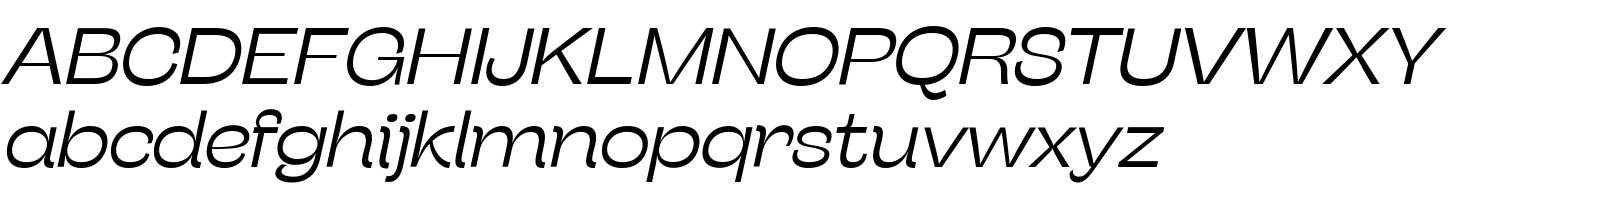

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Button(description='Condensed', style=ButtonStyle())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Button(description='Narrow', style=ButtonStyle())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Button(description='Wide', style=ButtonStyle())

<IPython.core.display.Javascript object>

In [ ]:
setup()

In [ ]:
print('Caunt of clicks {}'.format(len(classify)))
classify

Caunt of clicks 6


[('StingerWideTrial-Thin.ttf', 'Condensed'),
 ('StingerWideTrial-Heavy.ttf', 'Narrow'),
 ('RFDewiExpanded-BlackItalic.ttf', 'Wide'),
 ('RFDewiExpanded-Bold.ttf', 'Condensed'),
 ('Micra.otf', 'Narrow'),
 ('BRRRTrial-Skrrt.otf', 'Wide')]

## Create DataBase

In [ ]:
ratio = [1]
num_skipped = 0
cnt = [0]*len(classify)
for fname in classify:
  if fname[0] in os.listdir(path_to_all_fonts):
    # cnt += 1
    fpath = os.path.join(path_to_save_data, fname[0])
    folder_name = fname[1]
    # print(fpath)
    os.replace(fpath, path_to_save_data+folder_name+'/'+fname[0])
    # print(category.index(folder_name))
    cnt[category.index(folder_name)] += 1
for idx, className in enumerate(category):
  print('Подготовлено шрифтов типа {}: {} штук'.format(className, cnt[idx]))

4
4
2
4
4
Подготовлено шрифтов типа Display: 0 штук
Подготовлено шрифтов типа Sans Serif: 0 штук
Подготовлено шрифтов типа Serif: 1 штук
Подготовлено шрифтов типа Monospaced: 0 штук
Подготовлено шрифтов типа Handwritten: 4 штук
